# Visualisation des données

In [231]:
%reset -f

In [232]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from ast import literal_eval as l_eval
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [233]:
%matplotlib nbagg

In [234]:
df_simu = pd.read_csv("../../data/df_simu.csv", converters={'rho':l_eval})

N = df_simu.loc[0, 'N']
M = df_simu.loc[0, 'M']
step_count = df_simu.loc[0, 'step_count']

print("taille du maillage :", (N, M))
print("nombre d'itérations:", step_count)

taille du maillage : (50, 50)
nombre d'itérations: 299


In [235]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

## make x, y and rho from df_simu

# img = ax.plot_trisurf(x, y, rho, cmap='viridis', edgecolor='none')
# fig.colorbar(img, shrink=0.5, aspect=5)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlim3d([-0.1, 1.1])
# ax.set_title('densité',size="x-large", y=1.)

# ax.view_init(-90, -90);

<IPython.core.display.Javascript object>


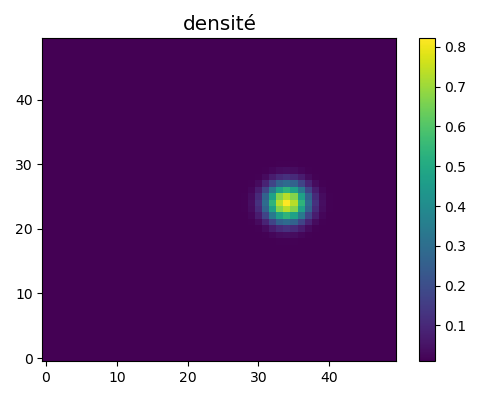

(min, max) = 0.01 0.821325


In [236]:
# Plot de densite sous imshow
fig, ax = plt.subplots(1,1,figsize=(5,4))

# pour placer les indices entre 1 et N
def set_ticks(ax):
    spacing = 20
    ax.set_xticks(np.arange(0, N, spacing))
    ax.set_xticklabels(np.arange(1, N+1, spacing))
    ax.set_yticks(np.arange(0, M, spacing))
    ax.set_yticklabels(np.arange(1, M+1, spacing))

def min_max(mat, dim=2):
    mat_min = mat
    for i in range(dim-1, -1, -1):
        mat_min = np.nanmin(mat_min, axis=i)
        
    mat_max = mat
    for i in range(dim-1, -1, -1):
        mat_max = np.nanmax(mat_max, axis=i)

    return mat_min, mat_max

rho = np.array(df_simu.loc[0, 'rho'])
rho_min, rho_max = min_max(rho)
print("(min, max) =", rho_min, rho_max)

img = ax.imshow(rho, origin='lower', cmap="viridis", interpolation='none', aspect='auto', vmin=rho_min, vmax=rho_max)
fig.colorbar(img, ax=ax)
# set_ticks(ax)
ax.set_title("densité", size="x-large")

plt.tight_layout()

In [237]:
# Les donnees pour le plot des signaux
e = np.empty(shape=(step_count, M, N), dtype=float)
f = np.empty(shape=(step_count, M, N), dtype=float)
t = np.empty(shape=(step_count, M, N), dtype=float)
tr = np.empty(shape=(step_count, M, N), dtype=float)

for i in range(step_count):
    file_name = "../../data/anim/animation." + str(i) + ".csv";
    df = pd.read_csv(file_name)
    e[i] = np.array(df['E']).reshape(M, N)
    f[i] = np.sqrt(np.array(df['F_x'])**2 + np.array(df['F_y'])**2).reshape(M, N)
    t[i] = np.array(df['T']).reshape(M, N)
    tr[i] = np.array(df['Tr']).reshape(M, N)


# au temps final
display(df[:5])

,E,F_x,F_y,T,Tr
0,19.4341,9.11566,-0.110593,5.0,6.13483
1,19.4177,9.10662,-0.122378,5.0,6.13354
2,19.3993,9.09948,-0.134657,5.0,6.13208
3,19.3786,9.09435,-0.147333,5.0,6.13044
4,19.3555,9.09129,-0.160311,5.0,6.12862


<IPython.core.display.Javascript object>


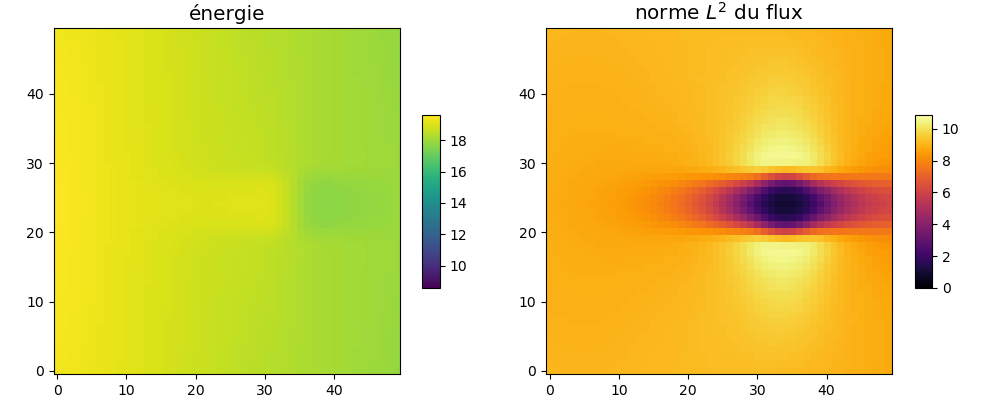

E: (min, max) = (8.575, 19.647000000000002)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
1,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
2,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
3,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
4,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
5,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
6,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
7,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
8,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575
9,18.6761,18.6463,18.6158,18.5821,18.5368,18.4589,18.3088,18.0272,17.5466,16.8166,...,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575,8.575


F: (min, max) = (0.0, 10.890069102821341)


In [238]:
# Plot l'energie et la norme du flux

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(1,2,figsize=(10,4))

e_min, e_max = min_max(e, 3)
print("E: (min, max) =", (e_min, e_max))

display(pd.DataFrame(e[50]))
# e = e[:40]
# f = f[:40]

img1 = ax[0].imshow(e[0], origin='lower', cmap="viridis", interpolation='none', vmin=e_min, vmax=e_max)
fig.colorbar(img1, shrink=0.5, aspect=10, ax=ax[0])
# set_ticks(ax[0])
ax[0].set_title("énergie", size="x-large")

f_min, f_max = min_max(f, 3)
print("F: (min, max) =", (f_min, f_max))

img2 = ax[1].imshow(f[0], origin='lower', cmap="inferno", interpolation='none', vmin=f_min, vmax=f_max)
fig.colorbar(img2, shrink=0.5, aspect=10, ax=ax[1])
# set_ticks(ax[1])
ax[1].set_title(r"norme $L^2$ du flux", size="x-large")

plt.tight_layout()

def animate(i):
    img1.set_array(e[i])    
    img2.set_array(f[i])

    return [img1, img2]

anim = FuncAnimation(fig, animate, frames=step_count, repeat=False, interval=200)
plt.show()

In [239]:
# mat_min = min_max(e, dim=2)

# print(mat_min)

In [240]:
# n_seconds = 20
# fps = step_count / n_seconds
# anim.save('video.mp4', writer='ffmpeg', fps=fps)